In [23]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

Faire attention quand on utilise l’interpolation car il peut se cacher des oscilations entres les différents points observés

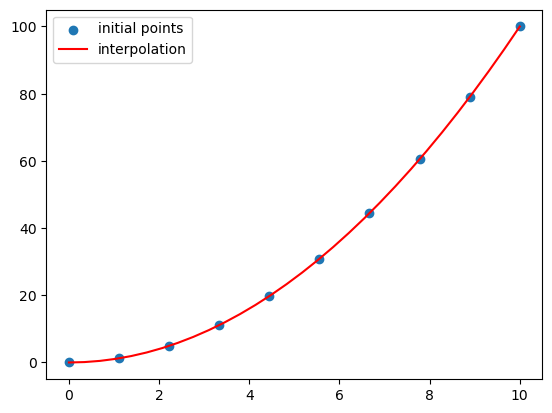

In [14]:
x = np.linspace(0, 10, 10)
y = x**2

f = interp1d(x, y, kind='cubic') # kind est le type d’interpolation que nous voulons effectuer, par défault linear

new_x = np.linspace(0, 10, 30)
result = f(new_x)

plt.figure()
plt.scatter(x, y, label='initial points')
plt.plot(new_x, result, c='red', label='interpolation')
plt.legend()

On veut développer une fonction statistique qui rentre dans notre nuage de point, on utilisera curve fit qui est la méthodes des moindres carrés.

Il vaut mieux utiliser ces fonctions avec sklearn.

In [32]:
from scipy import optimize

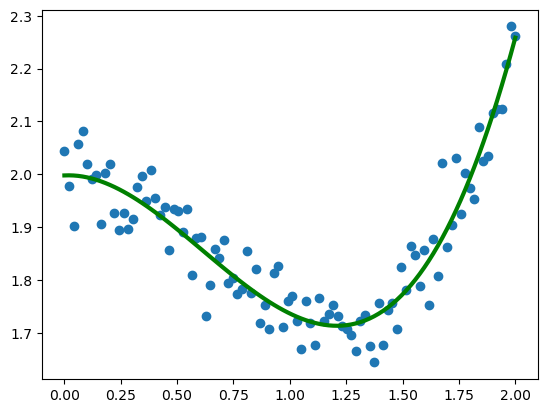

In [30]:
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0]) / 20 # Polynome de degrès 3 avec du bruit

def model(x, a, b, c, d): 
    return a * x**3 + b * x**2 + c * x + d # Création d’un model de degrès 3

params, params_cov = optimize.curve_fit(f, x, y) # Retourne 2 tableaux numpy avec les différents paramétres et la matrice de covariance

plt.scatter(x, y)
plt.plot(x, model(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

## Minimise

Prend la fonction à minimiser ainsi que le point de départ, s’arrête au premier minimum local trouvé. Plusieurs algo de minimisation peuvent être spécifés.

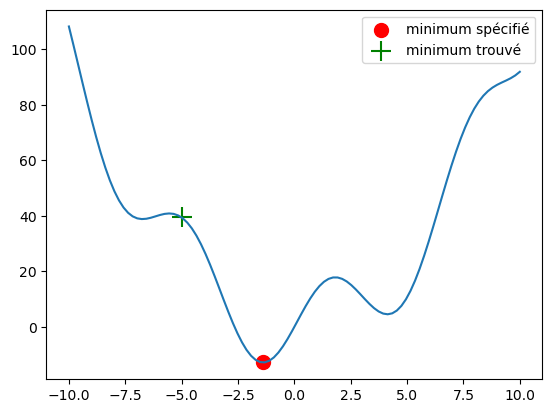

In [47]:
x = np.linspace(-10, 10, 100)

def f(x):
    return x**2 + 15*np.sin(x)

x0 = -5 # prendre différent points de départ pour trouver le global,
result = optimize.minimize(f, x0=-5).x   # le paramétres se trouve dans x

plt.plot(x, f(x))
plt.scatter(result, f(result), s=100, c='r', zorder=1, label='minimum spécifié')
plt.scatter(x0, f(x0), s=200, marker='+',c='g', zorder=1, label='minimum trouvé')
plt.legend()

Aussi en 2D et d’autres dimensions 

In [51]:
def f(x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

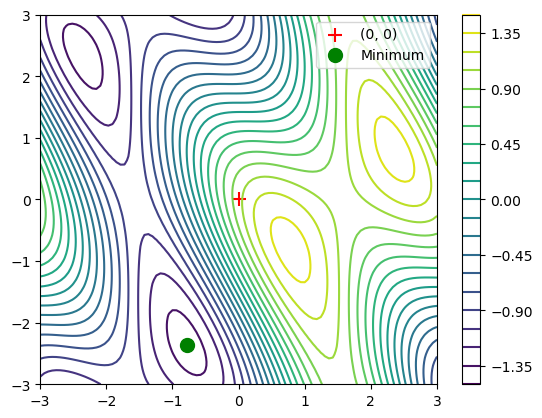

In [64]:
X = np.linspace(-3, 3, 100)
Y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(X, Y)
plt.contour(X, Y, f(np.array([X, Y])), 20)
plt.colorbar()

x0 = np.zeros(2)
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='(0, 0)')

result = optimize.minimize(f, x0=x0).x
plt.scatter(result[0], result[1], c='g', s=100, label='Minimum')
plt.legend()

## Traitement du signal

Consiste a éliminé toute tendance linéaire dans un signal. Cela recentre le signal près de 0 pour mieux examiner les fréquences

In [68]:
from scipy import signal

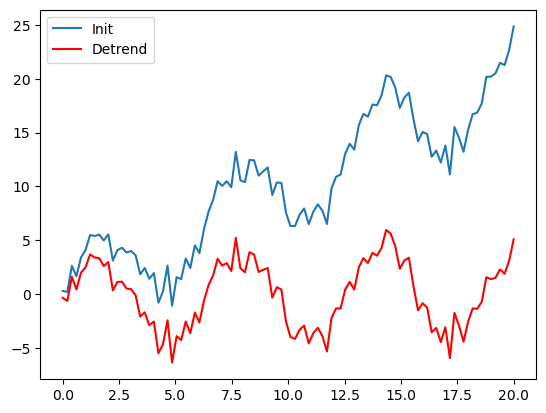

In [71]:
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
new_y = signal.detrend(y)
plt.plot(x,y, label='Init')
plt.plot(x, new_y, c='r', label='Detrend')
plt.legend()

Transformation de Fourier

In [95]:
from scipy import fftpack

Text(0.5, 1.0, 'Fourier')

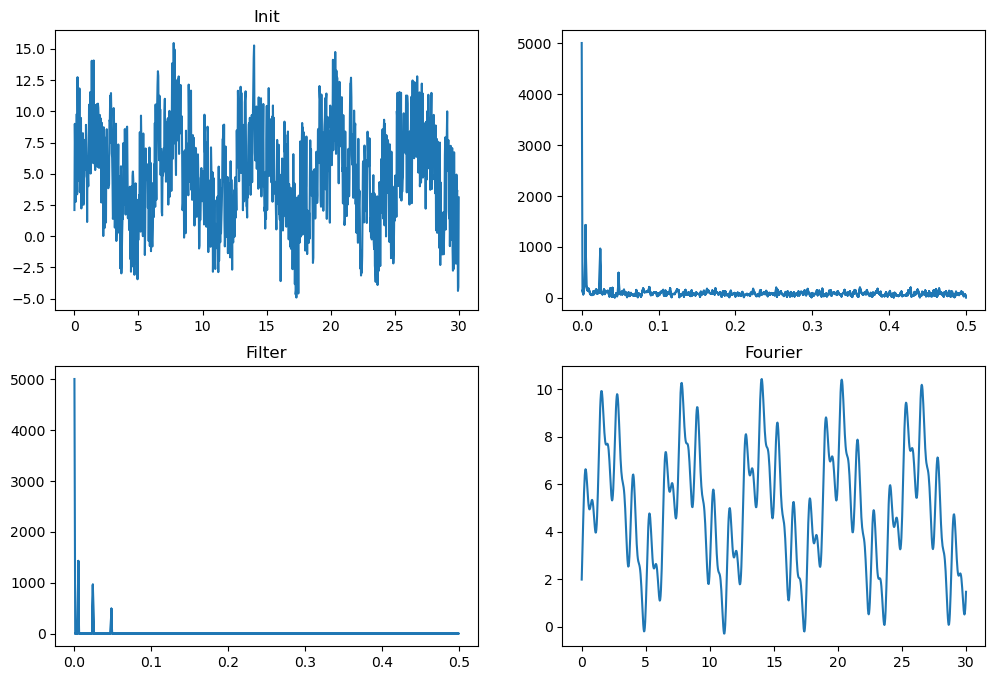

In [96]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x,y, label='Init')
plt.title('Init')

plt.subplot(2, 2, 2)
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

plt.subplot(2, 2, 3)
fourier[power<400] = 0
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Filter')

plt.subplot(2, 2, 4)
filtered_signal = fftpack.ifft(fourier)
plt.plot(x, filtered_signal)
plt.title('Fourier')

c:\Users\agobbe\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\agobbe\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


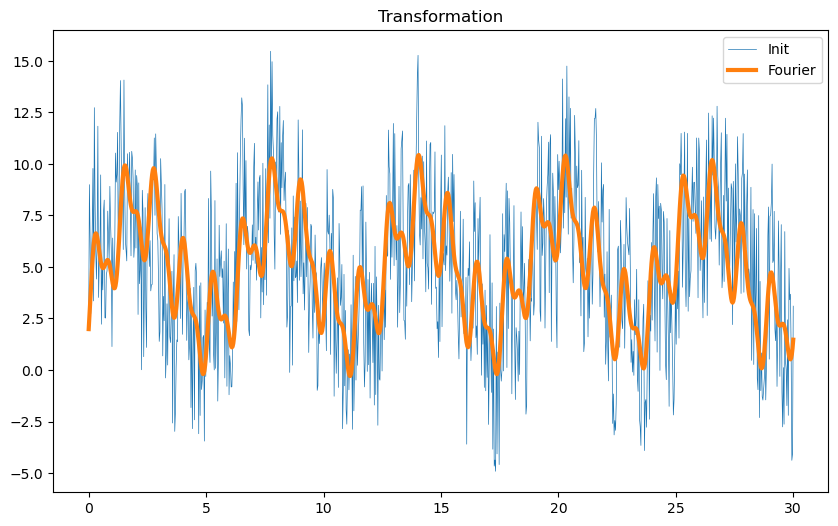

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, lw=0.5, label='Init')
plt.plot(x, filtered_signal, lw=3, label='Fourier')
plt.title('Transformation')
plt.legend()

## Traitement d’image

La morphology est une technique mathématique qui consiste à faire balader une structure sur une matrice et lorsqu’elle croise un pixel blanc, elle va effectuer soit une dilation ou une érosion, en fonction de ce qu’on lui demande : 

- Dilation : Imprime des pixels blanc autour de la structure
- Erosion : Efface des pixels blanc autour de la structure

Cela permet d’enlever des artefacts que l’on pourrai avoir sur une image

In [103]:
from scipy import ndimage

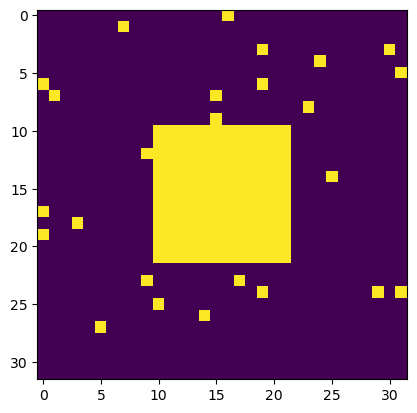

In [105]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10: -10, 10: -10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

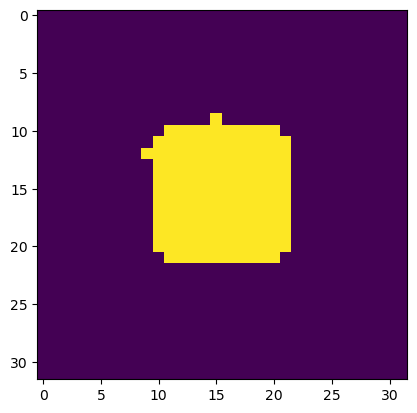

In [107]:
open_x = ndimage.binary_opening(X) # Combinaison entre érosion et dilation
plt.imshow(open_x) # Le cout est d’endommager la structure qui nous intérésse

# Extraire des données d’une image

- Extraire les bactéries de l’arrière plan de la photo 

- Nettoyer les artefacts

- Mesurer les longueurs

(511, 554)

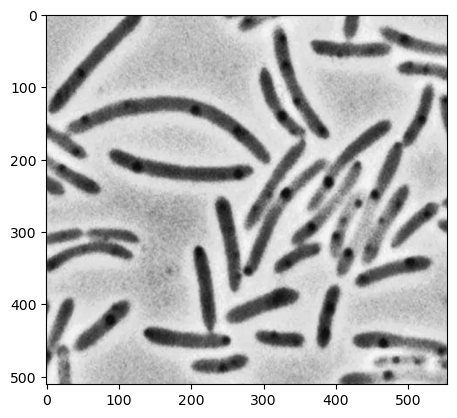

In [127]:
image = plt.imread('bacteria_cell.png') # Converti l’image en matrice
image = image[:, :, 0]
plt.imshow(image, cmap='gray') # Affiche l’image
image.shape

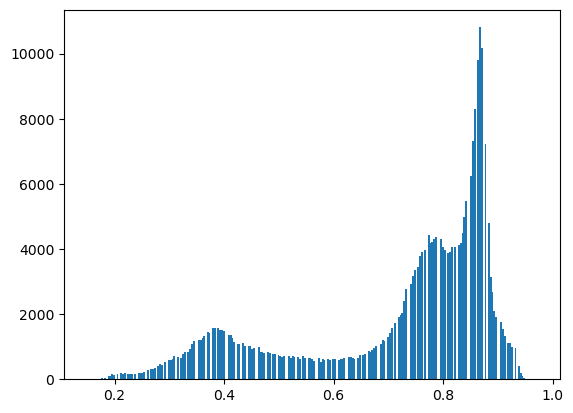

In [128]:
# copy de l'image, puis création d'un histogramme
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

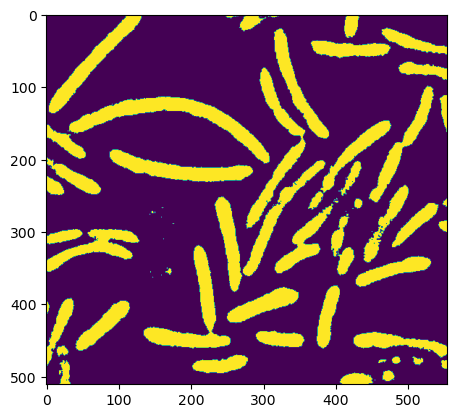

In [ ]:
# boolean indexing: création d'une image binaire
image= image<0.6 
plt.imshow(image)

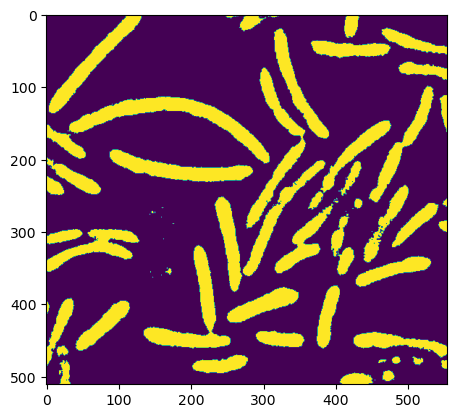

In [131]:
open_x = ndimage.binary_opening(image) # Nettoyage des artefacts
plt.imshow(image)

57


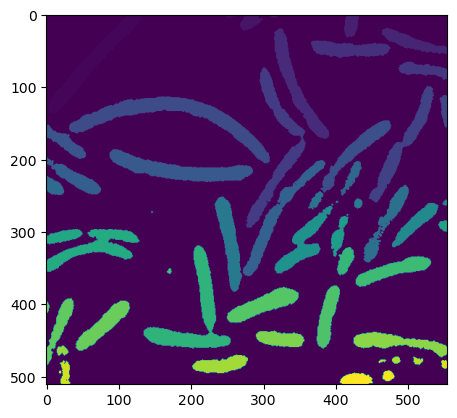

In [ ]:
label_image, n_labels = ndimage.label(open_x) # Retourne l’étiquette et les groupes
print(n_labels)
plt.imshow(label_image)

Text(0.5, 1.0, 'Bacterias Sizes')

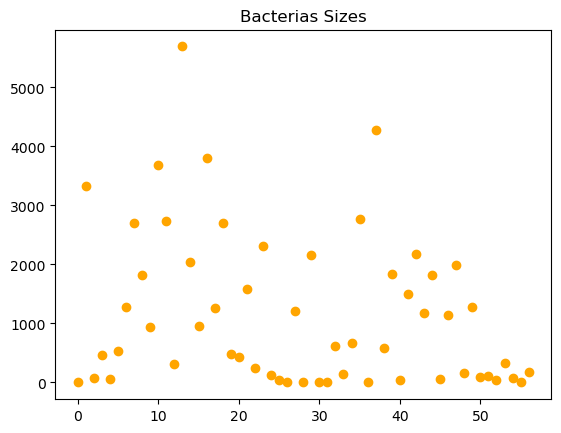

In [139]:
sizes = ndimage.sum(open_x, label_image, range(n_labels)) # compte les pixelsdes labels, prend l’image original, l’image qui contient les étiquettes, et le nombre d’étiquettes que l’on veut étudié
plt.scatter(range(n_labels), sizes, c='orange')
plt.title('Bacterias Sizes')